## Data Loading and Exploration + (EDA)

***Importing libraries***

In [68]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv('data/Churn_Modelling.csv')

In [3]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


As we can see our data has 14 features with 10000 entry and we can see that there is no null values in our data but there is some categorical features

## EDA

In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data[data.duplicated(subset=['CustomerId'] , keep = False)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


<Axes: xlabel='Exited', ylabel='count'>

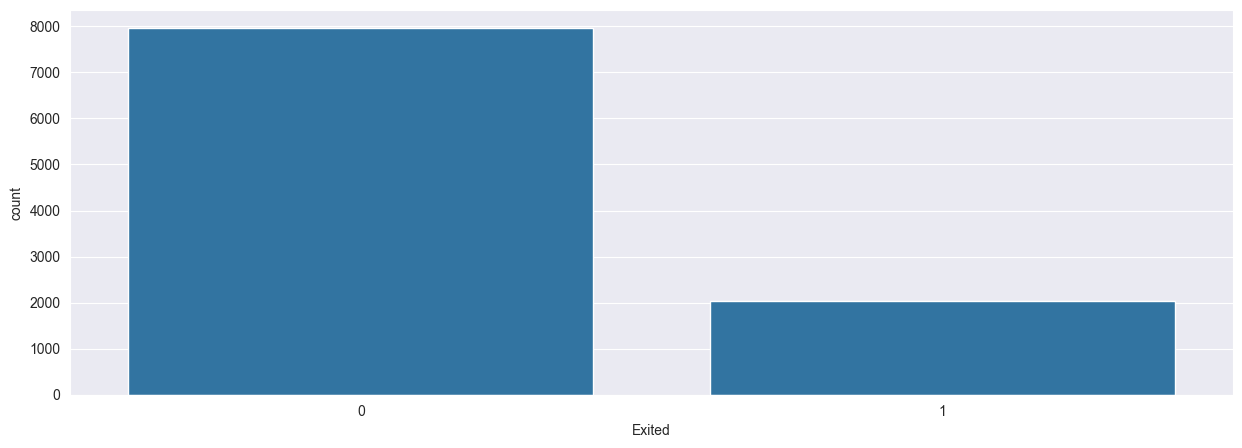

In [9]:
plt.figure(figsize=(15,5))
sns.countplot(data=data , x='Exited')

In [15]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

We can see that our data is highly unbalanced

In [20]:
#Deleting the useless features
data.drop(['RowNumber' , 'CustomerId' , 'Surname'], axis=1,inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [23]:
data.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [24]:
data.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

#### **Label Encoding**
Since 'Gender' and 'Geographie' is originally a categorical data type, we also need to convert it into numerical one. For this, we can perform a label encoding, where values are manually assigned to the corresponding keys, like "0" to a "France", using the `LabelEncoder() function.

In [25]:
labelencoder=LabelEncoder()
data['Gender']=labelencoder.fit_transform(data['Gender'])
data['Geography']=labelencoder.fit_transform(data['Geography'])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [26]:
data.dtypes

CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [27]:
data.corr()['Exited'].sort_values(ascending=False)

Exited             1.000000
Age                0.285323
Balance            0.118533
Geography          0.035943
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
Gender            -0.106512
IsActiveMember    -0.156128
Name: Exited, dtype: float64

<Axes: >

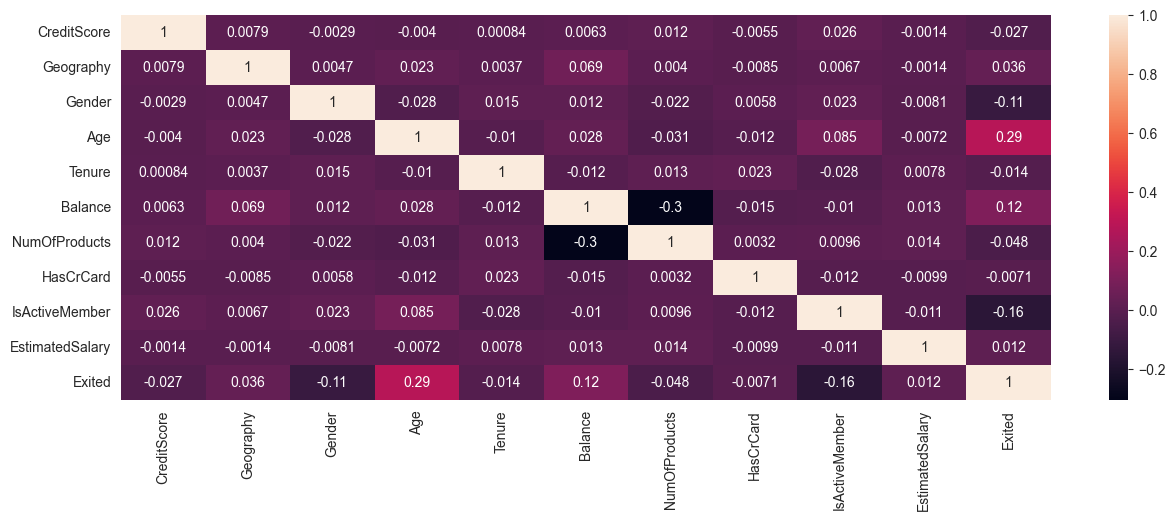

In [28]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True)

## Data Splitting

In [29]:
x = data.drop(['Exited'], axis=1)
y = data['Exited']

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7500, 10), (2500, 10), (7500,), (2500,))

## ML Algorithms

***Logistic Regresion:***



In [31]:
from sklearn.linear_model import LogisticRegression
#Without feature Scaling
logistic_reg=LogisticRegression()
logistic_reg.fit(x_train,y_train)

LogisticRegression()

In [32]:
print(logistic_reg.score(x_test,y_test))

0.7996


In [36]:
y_pred=logistic_reg.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [40]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 79.96%


In [41]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
x_train_scaled = scaler.fit_transform(x_train)

# Transform the test data
x_test_scaled = scaler.transform(x_test)

# Now perform logistic regression with the scaled features
logistic_reg_scaled = LogisticRegression()
logistic_reg_scaled.fit(x_train_scaled, y_train)


LogisticRegression()

In [43]:
print(logistic_reg_scaled.score(x_test_scaled,y_test))

0.8124


In [45]:
y_pred=logistic_reg_scaled.predict(x_test_scaled)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 81.24%


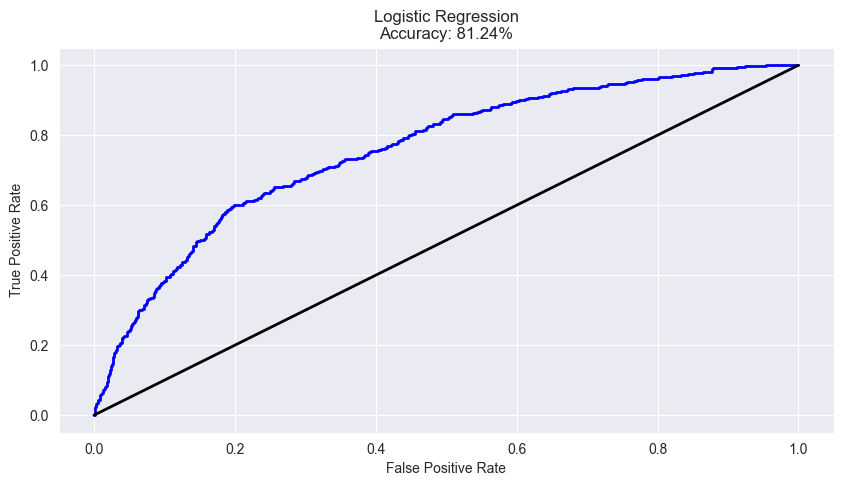

In [47]:
#Visualization
y_prob = logistic_reg_scaled.predict_proba(x_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='black', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.show()

## Random Forest



In [111]:
model= RandomForestClassifier()
model.fit(x_train ,y_train)

RandomForestClassifier()

In [112]:
model.score(x_train,y_train)

0.9997333333333334

In [113]:
#Prediction
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [114]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 86.72%


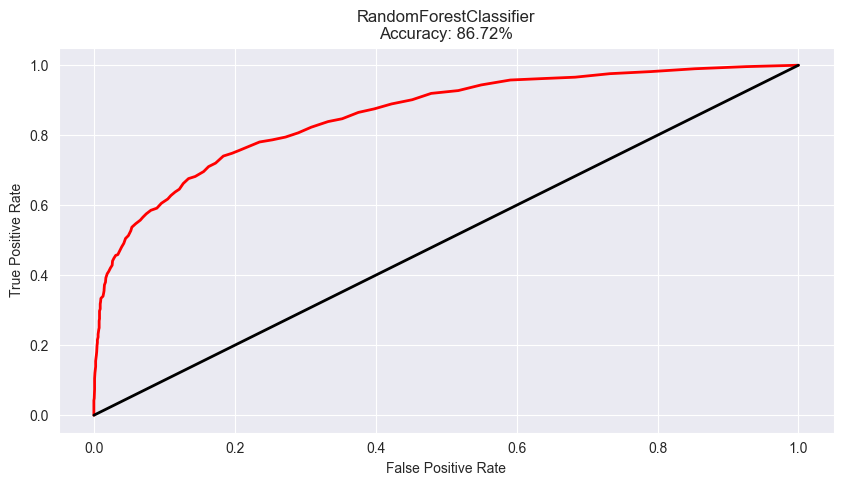

In [115]:
#Visualization
y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='red', lw=2)
plt.plot([0, 1], [0, 1], color='black', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.show()

## Gradient Boosting

In [104]:
#Create Gradient Boosting model
model2=GradientBoostingClassifier()
model2.fit(x_train,y_train)

GradientBoostingClassifier()

In [105]:

model2_score=model2.score(x_train, y_train)
print(model2_score)

0.8701333333333333


In [106]:
y_pred = model2.predict(x_test)

In [107]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score,ConfusionMatrixDisplay
precision_score(y_test,y_pred)

0.7889273356401384

In [108]:
recall_score(y_test,y_pred)

0.45875251509054327

In [109]:
f1_score(y_test,y_pred)


0.5801526717557252

In [110]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 86.80%


## Final Step : Comparing All models

In [120]:
model_names = [ "Logistic Regression" ,"Random Forest", "Gradient Boosting"]
models=[]
for model in [ LogisticRegression(), RandomForestClassifier() , GradientBoostingClassifier()]:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    models.append(accuracy)

In [121]:
pd.DataFrame({"Model": model_names,
                              "Accuracy_Score": models})

,Model,Accuracy_Score
0,Logistic Regression,0.7996
1,Random Forest,0.8672
2,Gradient Boosting,0.8680


We can see that Gradient Boosting has the best accuracy score between the tree prediction models